In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the dataset and Extracting the Independent and Dependent variables
companies = pd.read_csv('1000_Companies.csv')
X = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values

In [3]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<AxesSubplot:>

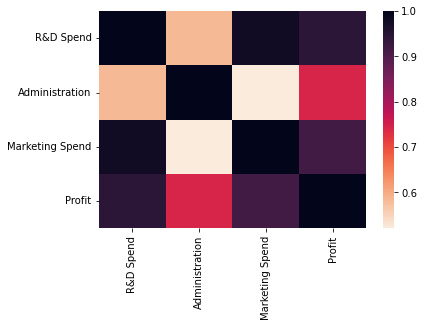

In [4]:
# Data Visualisation
# Building the Correlation matrix
cmap = sns.cm.rocket_r #para invertir los colores
sns.heatmap(companies.corr(), 
            cmap=cmap)

In [5]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# labelencoder = LabelEncoder()
# X[:, 3] = labelencoder.fit_transform(X[:, 3])
# onehotencoder = OneHotEncoder(categorical_features = [3])
# X = onehotencoder.fit_transform(X).toarray()

from sklearn.compose import ColumnTransformer 
ct = ColumnTransformer([("Name_Of_Your_Step", OneHotEncoder(),[3])], remainder="passthrough")#[3] columna a trasformar 
X=ct.fit_transform(X) 



In [6]:
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       ...,
       [1.0, 0.0, 0.0, 100275.47, 241926.31, 227142.82],
       [1.0, 0.0, 0.0, 128456.23, 321652.14, 281692.32],
       [0.0, 0.0, 1.0, 161181.72, 270939.86, 295442.17]], dtype=object)

In [7]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [10]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 89790.61532914,  88427.0718736 ,  94894.67836971, 175680.86725613,
        83411.73042087, 110571.90200074, 132145.2293644 ,  91473.37719685,
       164597.05380608,  53222.82667398,  66950.19050988, 150566.43987006,
       126915.20858596,  59337.85971048, 177513.91053064,  75316.28143049,
       118248.14406603, 164574.40699904, 170937.28981071, 182069.11645086,
       118845.03252688,  85669.95112227, 180992.59396146,  84145.08220144,
       105005.83769213, 101233.56772746,  53831.07669088,  56881.41475222,
        68896.39346903, 210040.00765886, 120778.72270894, 111724.87157654,
       101487.90541517, 137959.02649624,  63969.95996741, 108857.91214126,
       186014.7253199 , 171442.64130749, 174644.26529207, 117671.49128195,
        96731.37857432, 165452.25779411, 107724.34331255,  50194.54176911,
       116513.89532178,  58632.48986818, 158416.46827611,  78541.48521608,
       159727.66671745, 131137.87699644, 184880.70924519, 174609.08266882,
        93745.66352058,  

In [11]:
# Calculating the Coefficients
print(regressor.coef_)

[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]


In [12]:
# Calculating the Intercept
print(regressor.intercept_)

-51035.22972404823


In [13]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9112695892268872